#### Akash patil
aakashgolu1008@gmail.com

# Task 1: Titanic - Machine Learning from Disaster

### Dataset: Titanic Dataset

<p>
 Description :This task involves working with the Titanic dataset, which contains
passenger information from the ill-fated Titanic ship. The dataset
includes features such as age, gender, class, and whether passengers
survived or not. As a machine learning intern, your objective is to
build a predictive model that can classify whether a passenger
survived or not based on the available features. This is a binary
classification problem.</p>


1. Data Exploration:

- Begin by exploring the dataset to understand its structure and features. Check for missing data and outliers.

2. Data Preprocessing:

- Preprocess the data by handling missing values and converting categorical variables into a suitable format for machine learning.

3. Model Building:

- Choose and implement machine learning algorithms for classification, such as logistic regression, decision trees, random forests, or others.

4. Model Evaluation:

- Evaluate the performance of your model using appropriate metrics like accuracy, precision, recall, and Fl-score.

5. Model Tuning:
- Experiment with hyperparameter tuning to improve model performance.
6. Documentation:

- Create a report documenting your approach, findings, and the rationale behind your model choices.


In [1]:
# Import the necessary libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from prettytable import PrettyTable
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import classification_report 

In [4]:
#import the dataset
titanic= pd.read_csv("train.csv")
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
# Display information about the Titanic dataset
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### Observations from the info about Titanic Dataset

The provided DataFrame contains data related to passengers on the Titanic. Here are some initial observations:

1. **Number of Entries:** The dataset contains 891 entries (rows) with an index ranging from 0 to 890.

2. **Columns:** There are 12 columns in the dataset with the following information:

- `Survived` - If survived or no (0 = No, 1 = Yes) (Target variable)(int64).
- Numeric variables
    - `Passengerld`- Unique ID of each passsenger (int64)
    - `Age`- Age in years (float64), **indicating missing data.**
    - `SibSp`- Number of siblings / spouses aboard the Titanic (int64).
    - `Parch`- Number of parents / children aboard the Titanic (int64).
    - `Fare`- Passenger fare (float64)
- Strings:
    - `Name`- Name of passenger (object).
    - `Cabin`- Cabin number (object), **indicating missing data.**
    - `Ticket`- Ticket number (object).
- Categorical variables:
    - `Pclass`- Ticket class (1 = 1st, 2 = 2nd, 3 = 3rd)(int64).
    - `Sex`- Sex (string 'male' 'female')(object).
    - `Embarked`- Port of Embarkation (C = Cherbourg, Q = Queenstown, S = Southampton) (object),**indicating missing data.**

3. **Data Types:** The dataset includes 2 columns in float64,5 columns in int64, and 5 columns in object data types.

4. **Missing Values:** The columns 'Age,' 'Cabin,' and 'Embarked' have missing values. 'Age' and 'Embarked' have relatively fewer missing values compared to 'Cabin.'


In [6]:
# Display summary statistics for numeric columns
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# Observations -
Here are some observations based on the summary statistics for the Titanic dataset:

1. **PassengerId:**
   - Count: 891 passengers.
   - Observation: It seems to be a unique identifier for each passenger.

2. **Survived:**
   - Count: 891 passengers.
   - Observation: Approximately 38.4% of passengers survived.

3. **Pclass (Passenger Class):**
   - Count: 891 passengers.
   
4. **Age:**
   - Count: 714 passengers (some missing values).
   - Mean: Average age is approximately 29.7 years.
   - Min: Minimum age is 0.42 years.
   - Max: Maximum age is 80 years.

5. **SibSp (Number of Siblings/Spouses Aboard):**
   - Count: 891 passengers.
   - Observation: Most passengers traveled without siblings or spouses.

6. **Parch (Number of Parents/Children Aboard):**
   - Count: 891 passengers.
   - Observation: Most passengers traveled without parents or children.

7. **Fare:**
   - Count: 891 passengers.
   - Mean: Average fare is approximately 32.20.
   - Observation: Fares vary significantly, with some passengers having zero fare (possibly crew members) and others paying higher fares.


In [7]:
# Display summary statistics for object (string) columns
titanic.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


# Observations- 

1. **Name:**
   - Count: 891 passengers.
   - Unique: All names are unique.
   - Top: "Braund, Mr. Owen Harris" (occurs once).
   - Observation: Each passenger has a unique name.

2. **Sex:**
   - Count: 891 passengers.
   - Unique: Two unique values - male and female.
   - Top: "male" (occurs 577 times).
   - Observation: The majority of passengers are male.

3. **Ticket:**
   - Count: 891 passengers.
   - Unique: 681 unique ticket values.
   - Top: "347082" (occurs 7 times).
   - Observation: There are multiple passengers with the same ticket number.

4. **Cabin:**
   - Count: 204 passengers (many missing values).
   - Unique: 147 unique cabin values.
   - Top: "B96 B98" (occurs 4 times).
   - Observation: Many passengers have missing cabin information, and some cabins have multiple passengers.

5. **Embarked:**
   - Count: 889 passengers (2 missing values).
   - Unique: Three unique values - S, C, Q.
   - Top: "S" (occurs 644 times).
   - Observation: Most passengers boarded from port S (Southampton).


In [8]:
# Display survival rates based on Passenger Class (Pclass)
titanic.groupby("Pclass",as_index=False)["Survived"].mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [9]:
# Display survival rates based on Sex
titanic.groupby("Sex",as_index=False)["Survived"].mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [10]:
# Display survival rates based on Embarked
titanic.groupby("Embarked",as_index=False)["Survived"].mean().sort_values(by='Survived', ascending=False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.336957


In [11]:
# Display survival rates based on Number of Siblings/Spouses Aboard (SibSp)
titanic.groupby("SibSp",as_index=False)["Survived"].mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [12]:
# Display survival rates based on Number of Parents/Children Aboard (Parch)
titanic.groupby("Parch",as_index=False)["Survived"].mean().sort_values(by='Survived', ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


# Observations -
Here are some survival rates based on different factors in the Titanic dataset:

1. **Pclass (Passenger Class):**
   - Class 1: 62.96% survival rate.
   - Class 2: 47.28% survival rate.
   - Class 3: 24.24% survival rate.
   - Observation: Passengers in higher classes had higher survival rates.

2. **Sex:**
   - Female: 74.20% survival rate.
   - Male: 18.89% survival rate.
   - Observation: Females had a significantly higher survival rate compared to males.

3. **Embarked (Port of Embarkation):**
   - C (Cherbourg): 55.36% survival rate.
   - Q (Queenstown): 38.96% survival rate.
   - S (Southampton): 33.70% survival rate.
   - Observation: Passengers who boarded from Cherbourg had a higher survival rate.

4. **SibSp (Number of Siblings/Spouses Aboard):**
   - With 1 Sibling/Spouse: 53.59% survival rate.
   - With 2 Siblings/Spouses: 46.43% survival rate.
   - Without Siblings/Spouses: 34.54% survival rate.
   - Observation: Passengers with a small number of siblings/spouses had higher survival rates.

5. **Parch (Number of Parents/Children Aboard):**
   - With 3 Parents/Children: 60.00% survival rate.
   - With 1 Parent/Child: 55.08% survival rate.
   - With 2 Parents/Children: 50.00% survival rate.
   - Without Parents/Children: 34.37% survival rate.
   - Observation: Passengers with a small number of parents/children had higher survival rates.


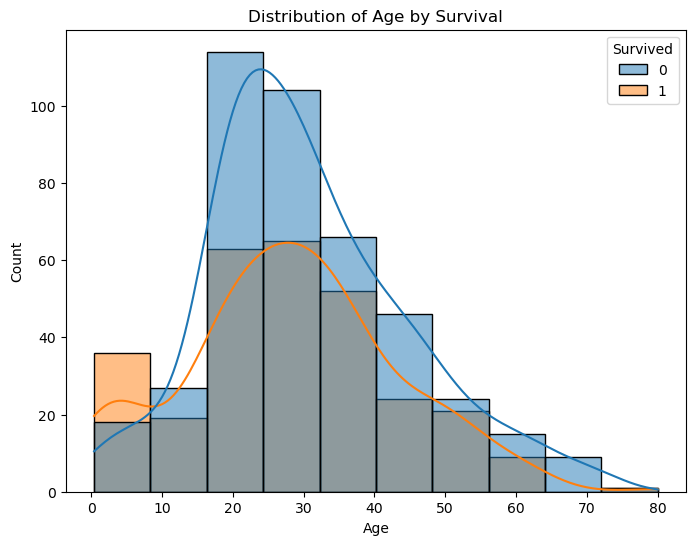

In [13]:
# Plotting histogram for Age distribution by Survival
plt.figure(figsize=(8, 6))
sns.histplot(data=titanic, x='Age', hue='Survived', kde=True,bins=10)
plt.title('Distribution of Age by Survival')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()


# Observation -
- Age from 0 - 10 most passangers are Survived 
- Large number of 20-35 year olds did not survive.
- Most passengers are in 20-40 age range.

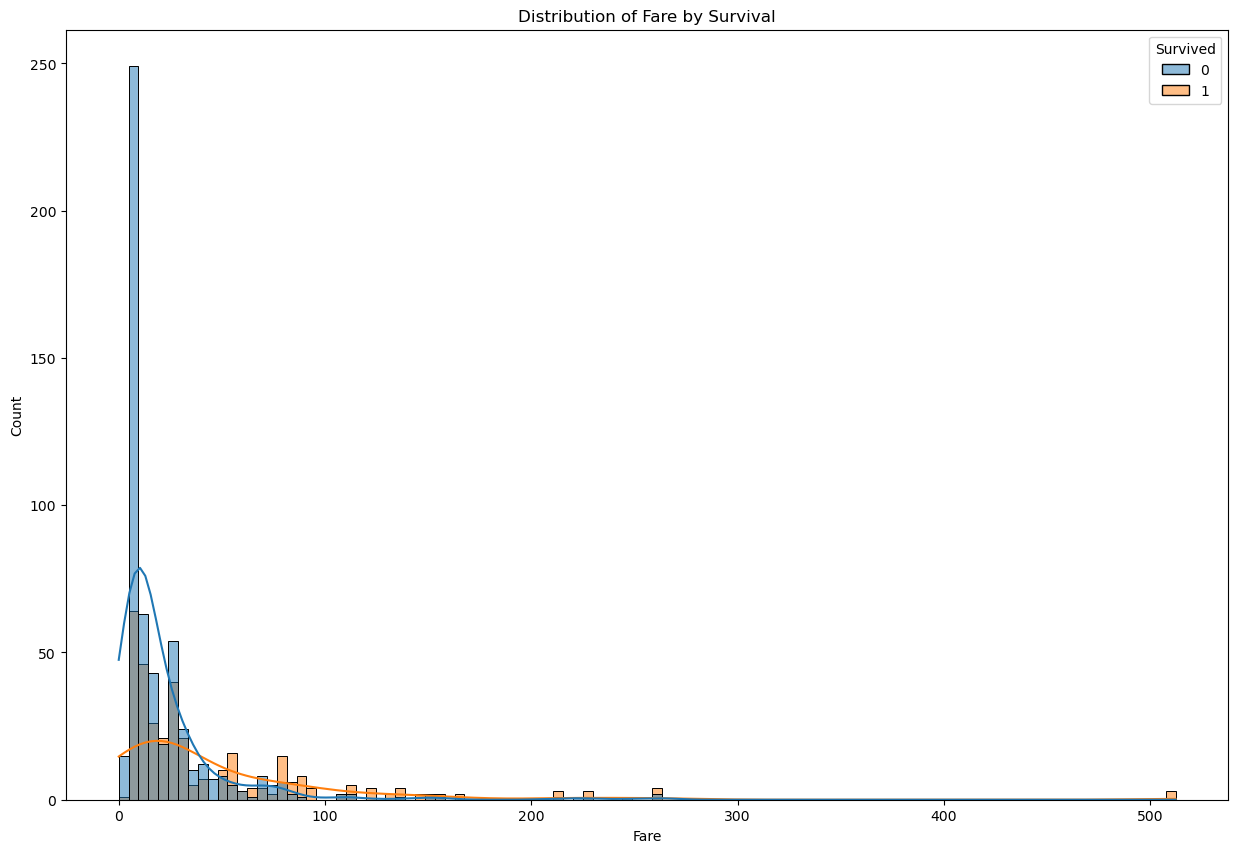

In [14]:
# Plotting histogram for Fare distribution by Survival
plt.figure(figsize=(15, 10))
sns.histplot(data=titanic, x='Fare', hue='Survived', kde=True)
plt.title('Distribution of Fare by Survival')
plt.xlabel('Fare')
plt.ylabel('Count')
plt.show()

# Observations 
- Higher fare paying passengers had better survival.

# Correlation

In [15]:
correlation_matrix =titanic.corr(method='spearman')
correlation_matrix 

C:\Users\Admin\AppData\Local\Temp\ipykernel_2092\288785388.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  titanic.corr(method='spearman')


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.034091,0.041010,-0.061161,0.001235,-0.013975
Survived,-0.005007,1.000000,-0.339668,-0.052565,0.088879,0.138266,0.323736
Pclass,-0.034091,-0.339668,1.000000,-0.361666,-0.043019,-0.022801,-0.688032
Age,0.041010,-0.052565,-0.361666,1.000000,-0.182061,-0.254212,0.135051
SibSp,-0.061161,0.088879,-0.043019,-0.182061,1.000000,0.450014,0.447113
Parch,0.001235,0.138266,-0.022801,-0.254212,0.450014,1.000000,0.410074
Fare,-0.013975,0.323736,-0.688032,0.135051,0.447113,0.410074,1.000000


C:\Users\Admin\AppData\Local\Temp\ipykernel_2092\72838870.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(titanic.corr(method='spearman'),annot=True,cmap="coolwarm", fmt=".2f", square=True)


<Axes: >

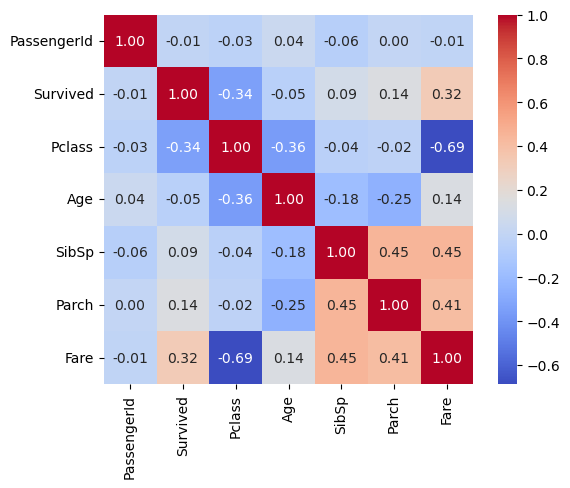

In [16]:
# Plotting the heatmap of the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", square=True)
plt.title('Spearman Correlation Matrix')
plt.show()

# Observations 
from the Spearman correlation matrix:

1. **Survived and Pclass**: There is a negative correlation of approximately -0.34, indicating that as the passenger class increases, the chances of survival decrease.

2. **Survived and Age**: The correlation is approximately -0.05, suggesting a slight negative correlation. This means that older passengers might have had slightly lower chances of survival.

3. **Survived and SibSp**: The correlation is approximately 0.09, indicating a weak positive correlation. This suggests that passengers with more siblings or spouses aboard might have had slightly higher chances of survival.

4. **Survived and Parch**: The correlation is approximately 0.14, indicating a weak positive correlation. This suggests that passengers with more parents or children aboard might have had slightly higher chances of survival.

5. **Survived and Fare**: There is a strong positive correlation of approximately 0.32, suggesting that passengers who paid higher fares had higher chances of survival.

6. **Pclass and Fare**: There is a strong negative correlation of approximately -0.69, indicating that as the passenger class increases, the fare decreases.

- The correlation between 'PassengerId' and 'Survived' is close to zero, indicating no linear relationship.
- 'PassengerId' appears to be an identifier with no direct impact on the likelihood of survival.
- so we can drop the PassengerId column.

In [17]:
# Check for duplicated rows
titanic.duplicated().sum()

0

### Missing values

In [18]:
# Display missing values in percentage
titanic.isnull().mean()*100

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

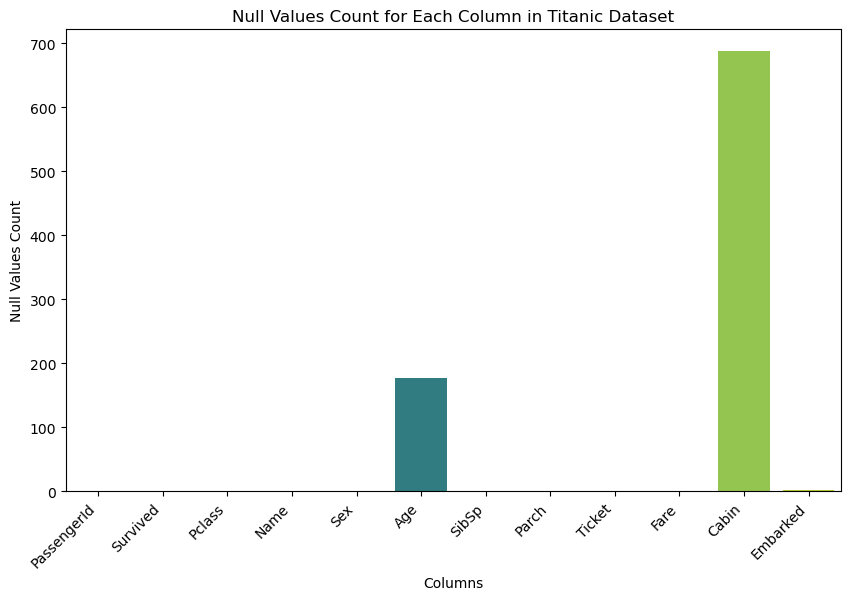

In [19]:
# Plotting bar chart for missing values count
titanic_null_counts = titanic.isnull().sum()
plt.figure(figsize=(10, 6))
sns.barplot(x=titanic_null_counts.index, y=titanic_null_counts.values, palette="viridis")
plt.xticks(rotation=45, ha="right")
plt.title("Null Values Count for Each Column in Titanic Dataset")
plt.xlabel("Columns")
plt.ylabel("Null Values Count")
plt.show()

# Observations 

1. **PassengerId, Survived, Pclass, Name, Sex, SibSp, Parch, Ticket, Fare, Embarked:**
   - These columns have no missing values (percentage of missing values is 0%).

2. **Age:**
   - Approximately 19.87% of the 'Age' values are missing.
   - You may choose to fill the missing age values with the mean, median, or use more advanced imputation techniques to preserve information.

3. **Cabin:**
   - A significant portion of the 'Cabin' column is missing, with approximately 77.10% of values being null.
   - Considering the high percentage of missing values, it's advisable to drop this column from the analysis.

4. **Embarked:**
   - A small percentage (0.22%) of 'Embarked' values are missing.
   - You may choose to fill the missing 'Embarked' values with the mode or use other imputation methods.

 **Updated Actions:**
   - **Age:** Fill missing values using an appropriate imputation method.
   - **Embarked:** Fill missing values using an appropriate imputation method.
   - **Cabin:** Drop the entire 'Cabin' column due to the high percentage of missing values.

### Missing Value Analysis

 Missing Values in Age
************************************


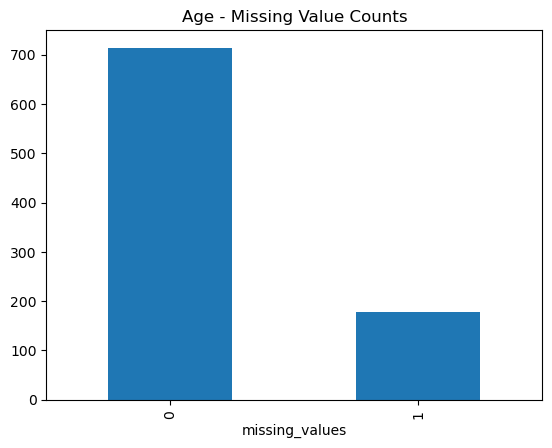

   missing_values  Survived  count
0               0         0    424
1               0         1    290
2               1         0    125
3               1         1     52


 Missing Values in Cabin
************************************


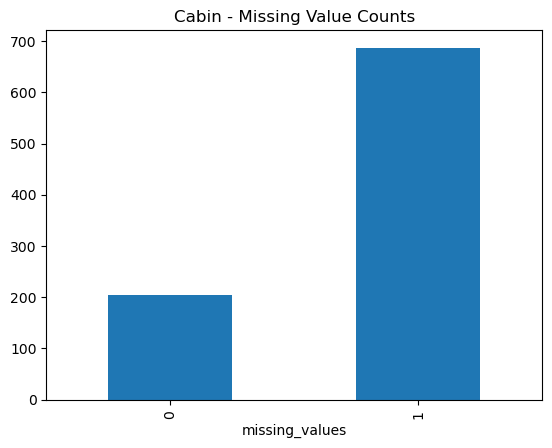

   missing_values  Survived  count
0               0         1    136
1               0         0     68
2               1         0    481
3               1         1    206


 Missing Values in Embarked
************************************


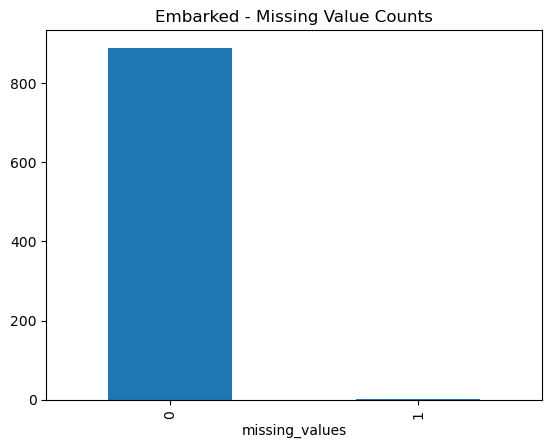

   missing_values  Survived  count
0               0         0    549
1               0         1    340
2               1         1      2




In [20]:
# Analyze missing values for each column
for i in titanic.columns:
    if titanic[i].isnull().sum() > 0:
        print(f" Missing Values in {i}")
        print("************************************")
        
        # Create a copy of the dataset
        df = titanic.copy()
        df["missing_values"] = np.where(df[i].isnull(), 1, 0)
        
        # Plot the count of Survived for missing and non-missing values
        survived_count = df.groupby("missing_values")["Survived"].count().plot(kind="bar")
        plt.title(f"{i} - Missing Value Counts")
        plt.show()
        
        # Print the count of Survived for missing and non-missing values
        print(df.groupby("missing_values",as_index=False)["Survived"].value_counts())
        print("\n")


## Observations
- Among the missing values in the 'Age' and 'Cabin' feature, 70% correspond to passengers who did not survive.

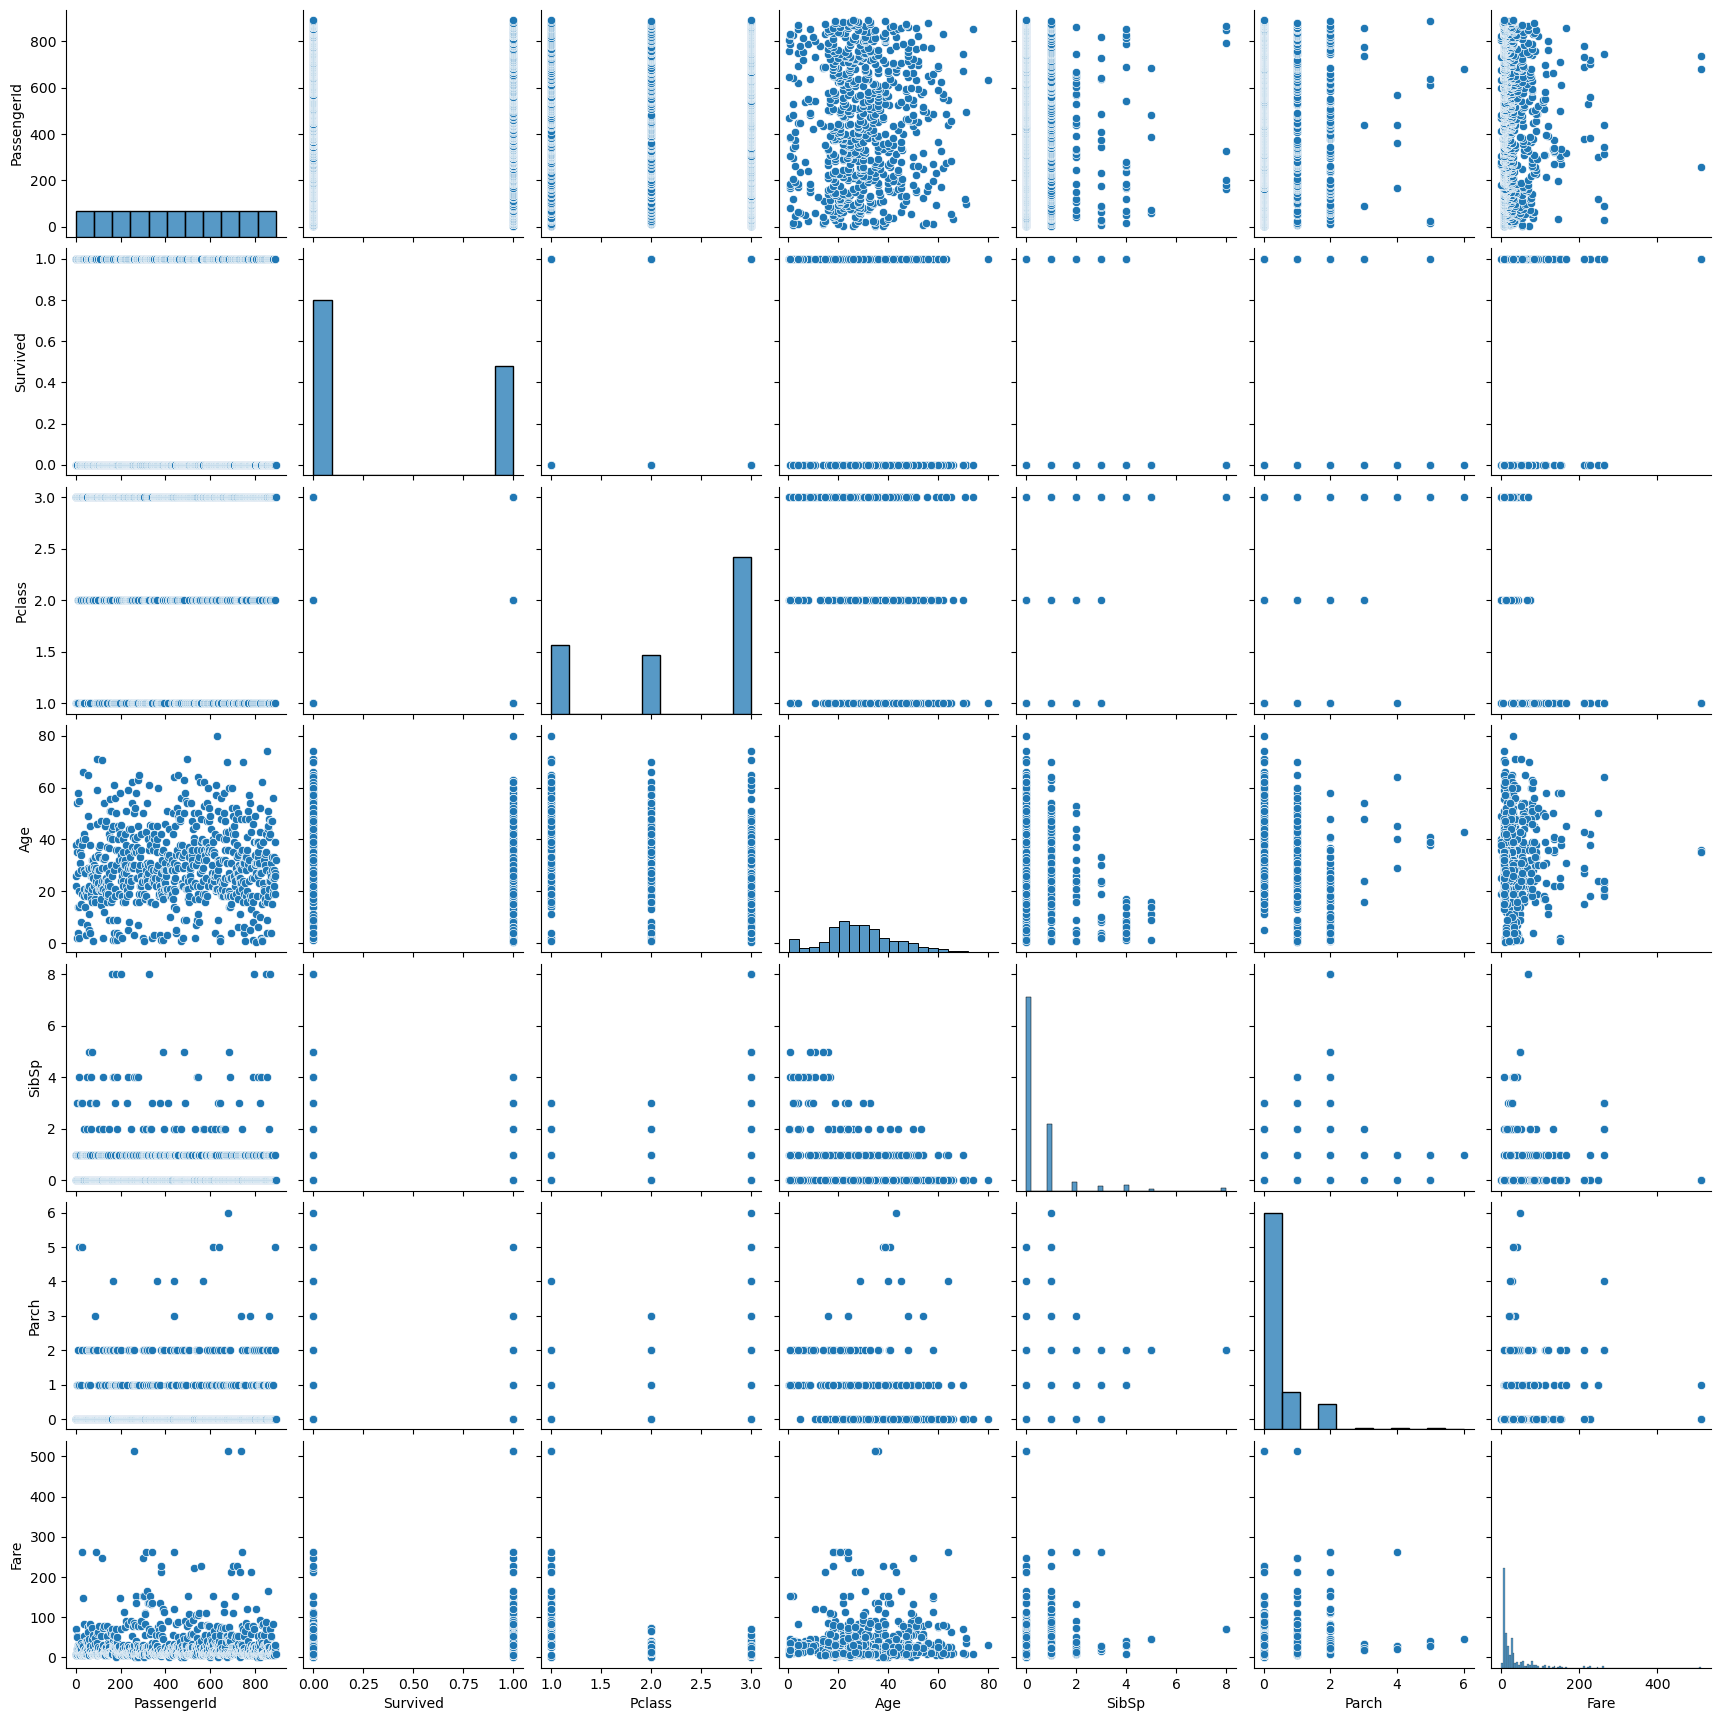

In [23]:
# Pairplot for numerical features
sns.pairplot(titanic)

## Feature Engineering

In [29]:
# in the data set there is no Duplicated values
# now first we drop the unwanted features (PassangerId,Name,Ticket and Cabin)


1. **PassengerId:**
   - **Reason:** It is typically a unique identifier for each passenger and does not contribute to the analysis or modeling. Dropping it helps reduce unnecessary information.

2. **Name:**
   - **Reason:** While the names of passengers are unique, extracting meaningful insights directly from names is challenging. For most analyses, the individual names are not relevant, and dropping the column simplifies the dataset.

3. **Ticket:**
   - **Reason:** Dropped due to its diverse and non-standardized nature, not contributing to survival prediction.

4. **Cabin:**
   - **Reason:** The 'Cabin' column has a significant percentage of missing values (77.1%). Imputing or using incomplete data may introduce bias, and the information itself may not be crucial for the analysis. Dropping it helps manage missing data and focus on more informative features.


In [30]:
# Drop unwanted features
titanic = titanic.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)
titanic

In [32]:
# Fill missing values for 'Age' and 'Embarked'
print("Age - Median -",titanic.Age.median())
titanic["Age"]=titanic["Age"].fillna(titanic["Age"].median())
print("Embarked- mode",titanic['Embarked'].mode().iloc[0])
titanic["Embarked"]=titanic["Embarked"].fillna(titanic["Embarked"].mode().iloc[0])

Median - 28.0


In [34]:
# Display the count of missing values after filling
titanic.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [35]:
# Create bands for 'Age' and Fare
age_bins = [0, 18, 35, 50, 100]  
age_labels = ['0-18', '19-35', '36-50', '51+']  
pd.cut(titanic['Age'], bins=age_bins, labels=age_labels, include_lowest=True)

0      19-35
1      36-50
2      19-35
3      19-35
4      19-35
       ...  
886    19-35
887    19-35
888    19-35
889    19-35
890    19-35
Name: Age, Length: 891, dtype: category
Categories (4, object): ['0-18' < '19-35' < '36-50' < '51+']

In [36]:
pd.qcut(titanic["Fare"],5)

0        (-0.001, 7.854]
1      (39.688, 512.329]
2          (7.854, 10.5]
3      (39.688, 512.329]
4          (7.854, 10.5]
             ...        
886       (10.5, 21.679]
887     (21.679, 39.688]
888     (21.679, 39.688]
889     (21.679, 39.688]
890      (-0.001, 7.854]
Name: Fare, Length: 891, dtype: category
Categories (5, interval[float64, right]): [(-0.001, 7.854] < (7.854, 10.5] < (10.5, 21.679] < (21.679, 39.688] < (39.688, 512.329]]

**we are categorizing the 'Age' and 'Fare' features into bands:**

For the 'Age' feature:
- If values are between 0 and 18, assign 0.
- If values are between 19 and 35, assign 1.
- If values are between 36 and 50, assign 2.
- If values are greater than 50, assign 3.

For the 'Fare' feature:
- If values are between -0.001 and 7.854, assign 0.
- If values are between 7.854 and 10.5, assign 1.
- If values are between 10.5 and 21.679, assign 2.
- If values are between 21.679 and 39.688, assign 3.
- If values are greater than 39.688, assign 4.

In [37]:
titanic["Age"]=np.where(titanic["Age"]<=18,0,
np.where((titanic["Age"]>18) & (titanic["Age"]<=35),1,
np.where((titanic["Age"]>35) & (titanic["Age"]<=50),2,3)))

In [38]:
titanic["Fare"]=np.where(titanic["Fare"]<=7.854,0,
np.where((titanic["Fare"]>7.854) & (titanic["Fare"]<=10.5),1,
np.where((titanic["Fare"]>10.5) & (titanic["Fare"]<=21.679),2,
np.where((titanic["Fare"]>21.679) & (titanic["Fare"]<=39.688),3,4))))

In [39]:
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,1,1,0,0,S
1,1,1,female,2,1,0,4,C
2,1,3,female,1,0,0,1,S
3,1,1,female,1,1,0,4,S
4,0,3,male,1,0,0,1,S


In [40]:
# Convert categorical features to numerical
titanic['Sex'] = titanic['Sex'].map({'male': 0, 'female': 1}).astype(int)
titanic['Embarked'] = titanic['Embarked'].map({'C':0,'Q':1,'S':2}).astype(int)

In [41]:
# Display the modified dataset with converted categorical features
titanic.head()

## Model Building

In [44]:
#Define X and y
X = titanic.drop('Survived', axis=1)
y = titanic['Survived']

In [45]:
#Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [46]:
# Define a function to train and evaluate models
def train_and_evaluate_model(model, X_train, y_train, X_test, y_test, scaler=None):
    if scaler:
        X_train = scaler.fit_transform(X_train)
        X_test = scaler.transform(X_test)

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    return accuracy, report


In [47]:
# Train and evaluate models
models = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'Logistic Regression': LogisticRegression(random_state=42),
    'SVM': SVC(random_state=42),
    'KNeighbors': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Naive Bayes': GaussianNB(),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'AdaBoost': AdaBoostClassifier(random_state=42)
}


In [48]:
# Results and Classification Report

results = []
Classification_result=[]
for name, model in models.items():
    if name in ['SVM', 'KNeighbors']:
        scaler = StandardScaler()
    else:
        scaler = None

    accuracy, report = train_and_evaluate_model(model, X_train, y_train, X_test, y_test, scaler)
    results.append({'Model': name, 'Accuracy': accuracy})
    Classification_result.append({'Model': name,'Classification Report': report})

 ### Model Evaluation

In [49]:
# Display results in ascending order of accuracy
results_df = pd.DataFrame(results).sort_values(by='Accuracy', ascending=False)

print("Results before hyperparameter tuning:")
print(results_df)


Results before hyperparameter tuning:
                 Model  Accuracy
0        Random Forest  0.843575
4        Decision Tree  0.821229
2                  SVM  0.810056
6    Gradient Boosting  0.810056
3           KNeighbors  0.804469
1  Logistic Regression  0.793296
7             AdaBoost  0.787709
5          Naive Bayes  0.770950


In [50]:
# Display Classification Reports for selected models
selected_models = ['Random Forest', 'Decision Tree']

for model_report in Classification_result:
    if model_report['Model'] in selected_models:
        print(f"Classification Report for {model_report['Model']} (Tuned):\n{model_report['Classification Report']}\n")


Classification Report for Random Forest (Tuned):
              precision    recall  f1-score   support

           0       0.85      0.90      0.87       105
           1       0.84      0.77      0.80        74

    accuracy                           0.84       179
   macro avg       0.84      0.83      0.84       179
weighted avg       0.84      0.84      0.84       179


Classification Report for Decision Tree (Tuned):
              precision    recall  f1-score   support

           0       0.83      0.88      0.85       105
           1       0.81      0.74      0.77        74

    accuracy                           0.82       179
   macro avg       0.82      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179




## Observation -
- Here, we applied multiple models, and the best accuracy score achieved was 83.35%, obtained with the Random Forest model.
- Therefore, we have chosen the Random Forest model for further analysis.

## Model Tuning

In [96]:
# Hyperparameter tuning for Random Forest (as it has the highest accuracy)
param_grid = {
    'n_estimators': [50,75, 100],
    'min_samples_split': [2,3],
    'min_samples_leaf': [1, 2],
    'max_features':["sqrt", "log2",6,5],
    'criterion': ["gini", "entropy"],
    'bootstrap': [True, False]
}

grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, scoring='accuracy',n_jobs = 1)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print(f"Best Hyperparameters: {best_params}")

Best Hyperparameters: {'bootstrap': True, 'criterion': 'entropy', 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}


In [97]:
# Train the model with the best hyperparameters
best_model = RandomForestClassifier(random_state=42, **best_params)
best_model.fit(X_train, y_train)

# Make predictions on the test set
predictions = best_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, predictions)
classification_rep = classification_report(y_test, predictions)

# Display model performance after hyperparameter tuning

print(f"Model Accuracy (After Tuning): {accuracy:.2%}")
print("Classification Report (After Tuning):\n", classification_rep)

Model Accuracy (After Tuning): 82.68%
Classification Report (After Tuning):
               precision    recall  f1-score   support

           0       0.84      0.88      0.86       105
           1       0.81      0.76      0.78        74

    accuracy                           0.83       179
   macro avg       0.82      0.82      0.82       179
weighted avg       0.83      0.83      0.83       179



## Observations 
- "After applying hyperparameter tuning, the accuracy of the random forest model did not improve. Therefore, we decided to use the default hyperparameters."

In [98]:
Best_model = RandomForestClassifier(random_state=42)

# Train the model
Best_model.fit(X_train, y_train)

# Make predictions on the test set
predictions = Best_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, predictions)
classification_rep = classification_report(y_test, predictions)

# Display model performance
print(f"Model Accuracy: {accuracy:.2%}")
print("Classification Report:\n", classification_rep)

Model Accuracy: 84.36%
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.90      0.87       105
           1       0.84      0.77      0.80        74

    accuracy                           0.84       179
   macro avg       0.84      0.83      0.84       179
weighted avg       0.84      0.84      0.84       179



# Import the Test Dataset

In [53]:
# Import the Test.csv
titanic_test=pd.read_csv("test.csv")
titanic_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [54]:
# Display information about the test dataset
titanic_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


## **Observations:**

1. **PassengerId:**
   - Count: 418 non-null entries.
   - Dtype: int64.
   - Observation: Unique identifier for each passenger.

2. **Pclass (Passenger Class):**
   - Count: 418 non-null entries.
   - Dtype: int64.
   - Observation: Ranges from 1 to 3, indicating the ticket class.

3. **Name:**
   - Count: 418 non-null entries.
   - Dtype: object.
   - Observation: Names of passengers, all unique.

4. **Sex:**
   - Count: 418 non-null entries.
   - Dtype: object.
   - Observation: Two unique values - male and female.

5. **Age:**
   - Count: 332 non-null entries (some missing values).
   - Dtype: float64.
   - Observation: Age in years, **with some missing values.**

6. **SibSp (Number of Siblings/Spouses Aboard):**
   - Count: 418 non-null entries.
   - Dtype: int64.
   - Observation: Number of siblings/spouses aboard.

7. **Parch (Number of Parents/Children Aboard):**
   - Count: 418 non-null entries.
   - Dtype: int64.
   - Observation: Number of parents/children aboard.

8. **Ticket:**
   - Count: 418 non-null entries.
   - Dtype: object.
   - Observation: Ticket number, with multiple unique values.

9. **Fare:**
   - Count: 417 non-null entries **one missing value.**
   - Dtype: float64.


10. **Cabin:**
    - Count: 91 non-null entries **many missing values.**
    - Dtype: object.
    - Observation: Cabin number, with multiple unique values.

11. **Embarked:**
    - Count: 418 non-null entries.
    - Dtype: object.
    - Observation: Port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton).

Note: The 'Age,' 'Fare,' and 'Cabin' columns have missing values that may need to be addressed.


In [55]:
# Display summary statistics for numeric columns in the test dataset
titanic_test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


## **Observations:**
Here are some summary statistics for the numeric columns in the test dataset:

1. **PassengerId:**
   - Count: 418 passengers.
   - Observation: PassengerId ranges from 892 to 1309.

2. **Pclass (Passenger Class):**
   - Count: 418 passengers.
   - Observation: Pclass ranges from 1 to 3.

3. **Age:**
   - Count: 332 passengers (some missing values).
   - Mean: Average age is approximately 30.27 years.
   - Min: Minimum age is 0.17 years.
   - Max: Maximum age is 76 years.

4. **Fare:**
   - Count: 417 passengers (one missing value).
   - Mean: Average fare is approximately 35.63.
   - Observation: Fares vary significantly, with values ranging from 0 to 512.33.


In [56]:
# Display summary statistics for object (string) columns in the test dataset
titanic_test.describe(include="O")

,Name,Sex,Ticket,Cabin,Embarked
count,418,418,418,91,418
unique,418,2,363,76,3
top,"Kelly, Mr. James",male,PC 17608,B57 B59 B63 B66,S
freq,1,266,5,3,270


## Observations:
Here are some summary statistics for the categorical columns in the test dataset:

1. **Name:**
   - Count: 418 passengers.
   - Unique: All names are unique.
   - Top: "Kelly, Mr. James" (occurs once).
   - Frequency: Most names occur only once.

2. **Sex:**
   - Count: 418 passengers.
   - Unique: Two unique values - male and female.
   - Top: "male" (occurs 266 times).
   - Frequency: Male is the most common gender.

3. **Ticket:**
   - Count: 418 passengers.
   - Unique: 363 unique ticket values.
   - Top: "PC 17608" (occurs 5 times).
   - Frequency: Some ticket numbers occur multiple times.

4. **Cabin:**
   - Count: 91 passengers (many missing values).
   - Unique: 76 unique cabin values.
   - Top: "B57 B59 B63 B66" (occurs 3 times).
   - Frequency: Some cabins have multiple passengers, and many passengers have missing cabin information.

5. **Embarked:**
   - Count: 418 passengers.
   - Unique: Three unique values - S, C, Q.
   - Top: "S" (occurs 270 times).
   - Frequency: Most passengers boarded from port S (Southampton).


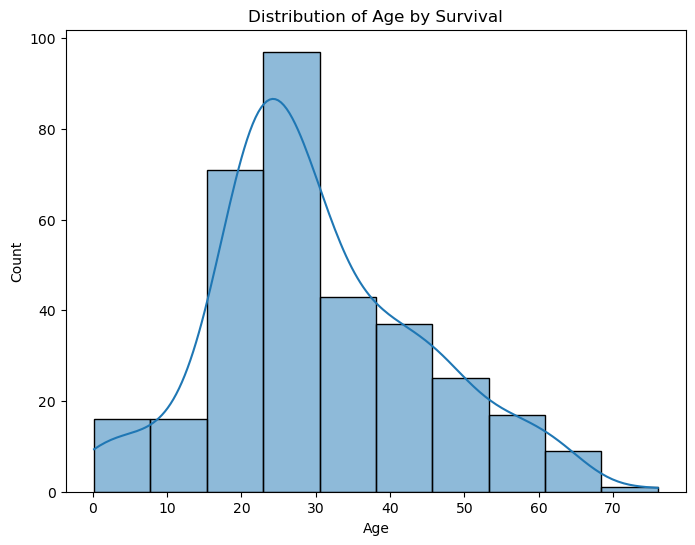

In [57]:
# Plotting histogram for Age distribution in the test dataset
plt.figure(figsize=(8, 6))
sns.histplot(data=titanic_test, x='Age', kde=True,bins=10)
plt.title('Distribution of Age by Survival')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()


## Observation 
- Most passengers are in 15- 35 age range.

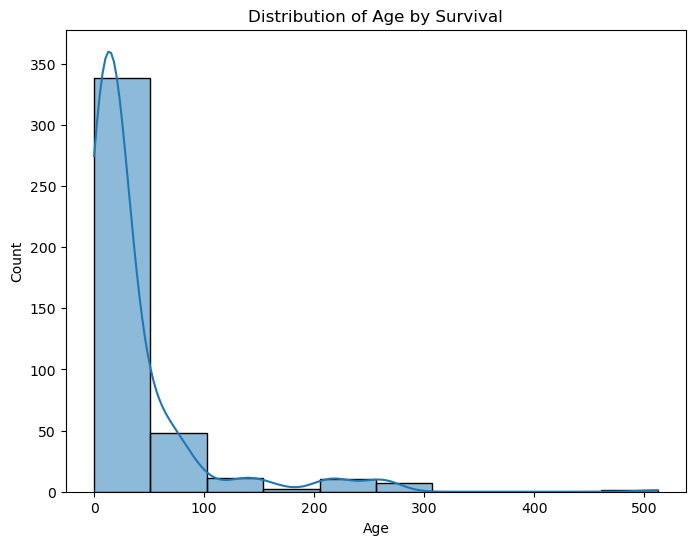

In [58]:
# Plotting histogram for Fare distribution in the test dataset
plt.figure(figsize=(8, 6))
sns.histplot(data=titanic_test, x='Fare', kde=True,bins=10)
plt.title('Distribution of Age by Survival')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

In [59]:
# Display missing values count in the test dataset
titanic_test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [60]:
# Display missing values percentage in the test dataset
titanic_test.isnull().mean()*100

PassengerId     0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            20.574163
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.239234
Cabin          78.229665
Embarked        0.000000
dtype: float64

## Observations:
The test dataset has missing values in the following columns:

1. **Age:**
   - Count: 86 missing values.
   - Percentage: Approximately 20.57% of the 'Age' values are missing.
   - Action: You may choose to fill the missing age values using an appropriate imputation method.

2. **Fare:**
   - Count: 1 missing value.
   - Percentage: Approximately 0.24% of the 'Fare' values are missing.
   - Action: You may choose to fill the missing 'Fare' value using an appropriate imputation method.

3. **Cabin:**
   - Count: 327 missing values.
   - Percentage: Approximately 78.23% of the 'Cabin' values are missing.
   - Action: Considering the high percentage of missing values, it's advisable to drop the 'Cabin' column from the analysis.

Note: The actions mentioned are recommendations, and the specific imputation or handling of missing values may depend on the analysis goals and dataset characteristics.


**In the test dataset, we're doing similar things as we did in the train dataset to make the data ready for predictions:**

1. **Handling Missing Values:**
   - We're checking and filling missing values in columns like 'Age' and 'Fare' using methods similar to what we did before.

2. **Creating Categories for Age and Fare:**
   - Just like in the train data, we're dividing 'Age' and 'Fare' into categories or groups to simplify the data and help the models understand patterns better.

3. **Converting Categorical to Numerical:**
   - We're changing text-based information like 'Sex' and 'Embarked' into numbers so that the computer can understand and use them for predictions.

4. **Dropping Unwanted Columns:**
   - We're removing columns like 'PassengerId,' 'Name,' 'Ticket,' and 'Cabin' that don't contribute much to predicting survival.

In simple terms, we're preparing the test data in the same way we prepared the training data, so the machine learning model can make predictions based on similar information it was trained on.

In [61]:
# we need to drop the features PassengerId,Name,Ticket,Cabin
titanic_test=titanic_test.drop(["PassengerId","Name","Ticket","Cabin"],axis=1)

In [62]:
titanic_test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.5,0,0,7.8292,Q
1,3,female,47.0,1,0,7.0000,S
2,2,male,62.0,0,0,9.6875,Q
3,3,male,27.0,0,0,8.6625,S
4,3,female,22.0,1,1,12.2875,S


In [63]:
# Fill missing values 
print("Age- Median -",titanic_test.Age.median())
titanic_test["Age"]=titanic_test["Age"].fillna(titanic_test["Age"].median())
print("Fare- Median -",titanic_test.Fare.median())
titanic_test["Fare"]=titanic_test["Fare"].fillna(titanic_test["Fare"].median())

Median - 27.0


In [65]:
titanic_test.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [66]:
# Fill missing values for 'Age' and 'Fare' in the test dataset
#for 'Age'
titanic_test["Age"]=np.where(titanic_test["Age"]<=18,0,
np.where((titanic_test["Age"]>18) & (titanic_test["Age"]<=35),1,
np.where((titanic_test["Age"]>35) & (titanic_test["Age"]<=50),2,3)))


In [67]:
#for 'Fare'
titanic_test["Fare"]=np.where(titanic_test["Fare"]<=7.854,0,
np.where((titanic_test["Fare"]>7.854) & (titanic_test["Fare"]<=10.5),1,
np.where((titanic_test["Fare"]>10.5) & (titanic_test["Fare"]<=21.679),2,
np.where((titanic_test["Fare"]>21.679) & (titanic_test["Fare"]<=39.688),3,4))))

In [68]:
# Convert categorical features to numerical in the test dataset
titanic_test['Sex'] = titanic_test['Sex'].map({'male': 0, 'female': 1}).astype(int)
titanic_test['Embarked'] = titanic_test['Embarked'].map({'C':0,'Q':1,'S':2}).astype(int)

In [69]:
# Display the modified test dataset with converted categorical features
titanic_test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,0,1,0,0,0,1
1,3,1,2,1,0,0,2
2,2,0,3,0,0,1,1
3,3,0,1,0,0,1,2
4,3,1,1,1,1,2,2


In [99]:
# Make predictions using the best model
predictions=Best_model.predict(titanic_test)
print(predictions)

[0 0 0 0 1 0 1 0 1 0 0 0 1 0 1 1 0 0 0 1 1 0 1 0 1 0 1 0 0 0 0 0 1 0 1 0 0
 0 0 1 0 1 0 1 1 0 0 0 1 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 1 1 1 0 0 1 1 0 0 0
 1 0 0 1 0 1 1 0 0 0 0 0 1 0 1 1 1 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0
 1 1 1 1 1 0 1 0 1 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0
 1 0 1 0 0 1 0 0 1 0 0 1 1 1 1 0 0 0 0 0 1 0 0 0 0 0 0 1 1 1 1 1 0 0 1 0 1
 0 1 0 0 0 0 1 1 0 1 0 1 1 0 0 1 1 1 1 0 0 1 0 1 0 0 0 0 1 0 0 1 0 1 0 1 0
 1 0 1 0 0 1 0 0 0 1 0 0 1 0 1 0 1 1 1 1 0 0 0 0 1 0 1 0 1 0 1 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 1 1 1 0 0 0 0 0 1 1 0 0 0 0
 1 0 0 0 0 0 0 0 1 1 1 0 0 1 0 0 0 0 1 1 1 0 0 0 0 0 0 1 1 0 1 0 0 0 1 0 0
 1 0 1 0 0 0 0 0 0 0 1 0 1 0 1 0 1 1 0 0 0 1 0 1 0 0 1 0 1 1 0 1 0 0 0 1 0
 0 1 0 0 1 1 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 1 0 0 1 0 1 0 0 1 0 1 0 0 0 0
 0 1 1 1 1 1 0 1 0 0 1]


In [71]:
test=pd.read_csv("test.csv")

In [101]:
# Create a DataFrame with 'PassengerId' and corresponding predictions
result_df = pd.DataFrame({'PassengerId': test['PassengerId'], 'Survived': predictions})

# Display the DataFrame
result_df


,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [102]:
result_df.to_csv("Submission.csv",index=False)

# Titanic Dataset Analysis Report

## Introduction
The Titanic dataset analysis aims to explore patterns and predict survival outcomes for passengers aboard the Titanic. The dataset contains information about passengers, such as their age, gender, class, and whether they survived or not.

## Approach

### Data Exploration
1. **Data Loading and Initial Inspection:**
   - Loaded the dataset into a Jupyter notebook.
   - Examined the first few rows to understand the data structure.

2. **Data Overview:**
   - Checked basic information using `info()` to identify data types and missing values.

3. **Descriptive Statistics:**
   - Utilized `describe()` to get summary statistics for numerical columns.
   - Extracted insights regarding the age, fare, and other numerical features.

4. **Categorical Overview:**
   - Used `describe(include=['O'])` to explore categorical columns.
   - Analyzed the distribution of names, sex, ticket, cabin, and embarked.

### Data Cleaning
5. **Handling Missing Values:**
   - Imputed missing values in 'Age' using the median.
   - Imputed missing values in 'Embarked' with the mode.
   - Dropped the 'Cabin' column due to a high percentage of missing values.

6. **Feature Engineering:**
   - Created bands for 'Age' and 'Fare' to simplify data.
   - Converted categorical features ('Sex' and 'Embarked') into numerical form.

7. **Drop Unwanted Columns:**
   - Eliminated unnecessary columns like 'PassengerId,' 'Name,' 'Ticket,' and 'Cabin' for model simplicity.

### Exploratory Data Analysis (EDA)
8. **Survival Analysis:**
   - Investigated survival rates based on passenger class, gender, embarked port, siblings/spouses, and parents/children.

9. **Histograms:**
   - Plotted histograms for age and fare to visualize distributions.

10. **Correlation Analysis:**
    - Explored correlations using a heatmap.

### Model Training and Evaluation
11. **Model Selection:**
    - Explored multiple models including Random Forest, Logistic Regression, SVM, KNeighbors, Decision Tree, Naive Bayes, Gradient Boosting, and AdaBoost.

12. **Model Evaluation:**
    - Trained and evaluated models on the training dataset.
    - Used accuracy and classification reports for model performance assessment.

13. **Selected Model:**
    - Chose the Random Forest classifier as the best-performing model.

### Test Dataset Preparation
14. **Handling Missing Values (Test Dataset):**
    - Checked and filled missing values in 'Age' and 'Fare' similar to the training dataset.

15. **Creating Categories and Converting Categorical to Numerical (Test Dataset):**
    - Divided 'Age' and 'Fare' into categories.
    - Converted categorical features ('Sex' and 'Embarked') into numerical form.

16. **Drop Unwanted Columns (Test Dataset):**
    - Eliminated unnecessary columns following the same logic as in the training dataset.

### Model Prediction on Test Dataset
17. **Predictions:**
    - Used the trained Random Forest model to predict survival outcomes on the test dataset.

## Findings
- Survival rates were higher for passengers in higher classes, females, and those boarding from Cherbourg.
- Younger passengers and those with smaller family sizes tended to have higher survival rates.
- Random Forest emerged as the best-performing model for predicting survival.

## Rationale
- **Model Choice:**
  - Random Forest is an ensemble learning method robust to overfitting, suitable for this dataset.
  - Its ability to handle complex relationships and capture feature importance aligns well with predicting survival.

- **Feature Engineering:**
  - Categorized features for simplicity and better model understanding.
  - Dropped irrelevant columns to avoid noise and improve model efficiency.

- **Handling Missing Values:**
  - Chose appropriate imputation methods based on the nature of missing data.

- **Data Exploration and Analysis:**
  - Explored survival trends based on different factors to understand underlying patterns.

## Conclusion
The Titanic dataset analysis revealed insights into survival factors and facilitated the creation of a predictive model. The Random Forest classifier, trained on the prepared dataset, offers a reliable tool for predicting passenger survival on the Titanic.

This analysis and model can be valuable for understanding historical events and provide a framework for similar predictive modeling tasks.